# Introduction

These are some simple velocity profiles under different conditions.

In [1]:
## Import modules

from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np

## Define helper functions

def num_to_latex_scientific(raw, sigfigs=3):
    
    scientific = "{:e}".format(raw)
    [num, exp] = scientific.split("e")
    
    num = num[:sigfigs+1] if num[0] != '-' else num[:sigfigs+2]

    sign = exp[0]
    exp = exp[1:]

    while(len(exp) != 1 and exp[0] == '0'):
        exp = exp[1:]

    if(sign == '-'):
        exp = "-" + exp

    return num + r"\times 10^{" + exp + r"}"
    

## Circular pipe with Fully Developed Flow

$$u = \frac{r^2-R^2}{4\mu}\left(\frac{dp}{ds} + \rho g\frac{dz}{ds}\right)$$

The maximum and average flow are

$$u_{\text{max}} = u(r=0) = 2u_{\text{avg}}$$

You can set the constants below and play around.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

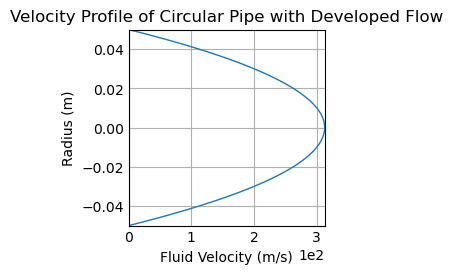

In [2]:
radius = 0.05
viscosity = 0.001
pressure_gradient = -500
density = 1
slope = 0

k = (pressure_gradient + density * 9.81 * slope) / (4 * viscosity)
u_max = -radius ** 2 * k

eq = r"u = u_{\text{max}} \left[1 - \left(\frac{r}{R}\right)^2\right] = " + num_to_latex_scientific(u_max) + r"\left[1 - \left(\frac{r}{R}\right)^2\right]"
constant = r"u_{\text{max}} = " + num_to_latex_scientific(u_max)

display(Math(constant))
display(Math(eq))

plt.style.use('_mpl-gallery')

# make data
y = np.linspace(-radius, radius, 100)
x = k * (y ** 2 - radius ** 2)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=1)

left = min(0, u_max)
right = max(0, u_max)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Fluid Velocity (m/s)")
plt.ylabel("Radius (m)")
ax.set(xlim=(left, right), ylim=(-radius, radius))
ax.set_title("Velocity Profile of Circular Pipe with Developed Flow")

plt.show()

## Flow between Two Planes

$$u = \frac{1}{2\mu} \left(\frac{dp}{dx} + \rho gm\right) y^2 + \left(\frac{U}{D} - \frac{D}{2\mu} \left(\frac{dp}{dx} + \rho gm\right) \right) y$$

Maximum flow is obviously $u_{\text{max}} = U$, and average flow is $\frac{U}{2} - \frac{D^2}{12\mu}\left(\frac{dp}{dx} + \rho gm\right)$.

You can set the constants below and play around.

<IPython.core.display.Math object>

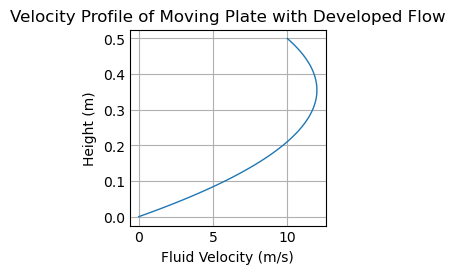

In [14]:
viscosity = 0.001
pressure_gradient = -10
density = 1
slope = 1
plate_speed = 10
spacing = 0.5

gradient = pressure_gradient + density * 9.81 * slope

def speed(y):
    return y ** 2 * gradient / (2 * viscosity) + y * (plate_speed / spacing - spacing * gradient / (2 * viscosity) )

average = plate_speed / 2 - gradient * spacing ** 2 / (12 * viscosity)

statement = r"u_{\text{avg}} = " + num_to_latex_scientific(average)
display(Math(statement))

plt.style.use('_mpl-gallery')

# make data
y = np.linspace(0, spacing, 100)

x = []

for i in range(100):
    x.append(speed(y[i]))

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=1)

plt.xlabel("Fluid Velocity (m/s)")
plt.ylabel("Height (m)")
ax.set_title("Velocity Profile of Moving Plate with Developed Flow")

plt.show()

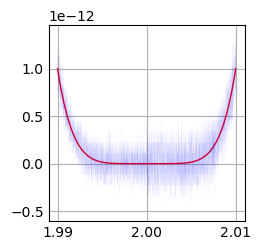

In [3]:
x = np.linspace(1.99,2.01,10000)
y1 = []
y2 = []

def accurate(x):
    return (x-2)**6

def inaccurate(x):
    return x**6 - 12 * x**5 + 60 * x**4 - 160 * x**3 + 240 * x**2 - 192 * x + 64

for i in range(10000):
    y1.append(accurate(x[i]))
    y2.append(inaccurate(x[i]))

plt.style.use('_mpl-gallery')

fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linewidth=1)
ax.plot(x, y2, color="blue", linewidth=0.01)

plt.show()